In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from src.experiments import compare_guarantees_experiment
from src.experiments import bargaining_gap_experiment

# settings

In [2]:
NUMBER_OF_EXPERIMENTS = 100
PRECISION = 10 # 6 decimal places

In [3]:
def calc_raios(data, metric_cols, all_cols, group_cols):
    ratios = pd.DataFrame()
    for g in metric_cols:
        for gd in all_cols:
            if g == gd:
                continue

            ratios[f'{g}/{gd}'] = data[g]/data[gd]
    
    for gc in group_cols:
        ratios[gc] = data[gc]

    return ratios



def base_experiment(data, group_cols, show_cols):
    random_exp_data = data.groupby(group_cols).first()[
        show_cols
    ]
    
    print('data and plot for random experiment')
    with pd.option_context('display.max_rows', None,):
        display(random_exp_data)
    random_exp_data.plot(figsize=(20, 10))
    plt.show()

# 1. Comparing guarantees

In [4]:
cg_exp = compare_guarantees_experiment.CompareGuaranteeExperiment()
cg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
cg_exp.columns

{'dc_gr',
 'familiar_share_gr',
 'goods_num',
 'max_min_gr',
 'min_max_gr',
 'sb_gr',
 'utility_type'}

In [5]:
guarantees_columns = cg_exp.columns - {'utility_type', 'goods_num'}
guarantees_columns

{'dc_gr', 'familiar_share_gr', 'max_min_gr', 'min_max_gr', 'sb_gr'}

In [6]:
data = cg_exp.load_experiment()

data and plot for random experiment


min_max_gr  familiar_share_gr     sb_gr  max_min_gr  \
utility_type goods_num                                                        
cav          3            1.261268           1.261268  1.261268    1.281171   
             5            1.466425           1.466425  1.502211    1.933220   
             10           2.586057           2.586057  2.715915    3.767929   
             20           4.768176           4.768176  5.021249    6.930215   
random       3            1.261268           1.261268  1.261268    1.281171   
             5            0.999630           1.466425  1.430639    1.466425   
             10           2.556095           2.586057  2.586057    2.827409   
             20           4.182145           4.768176  4.845740    5.116161   
vex          3            1.241366           1.261268  1.261268    1.261268   
             5            0.999630           1.466425  1.430639    1.466425   
             10           1.404185           2.586057  2.456199    2.586057   
             20           2.606136           4.768176  4.515102    4.768176   

                           dc_gr  
utility_type goods_num            
cav          3          1.271219  
             5          1.699823  
             10         3.176993  
             20         5.849195  
random       3          1.271219  
             5          1.233028  
             10         2.691752  
             20         4.649153  
vex          3          1.251317  
             5          1.233028  
             10         1.995121  
             20         3.687156

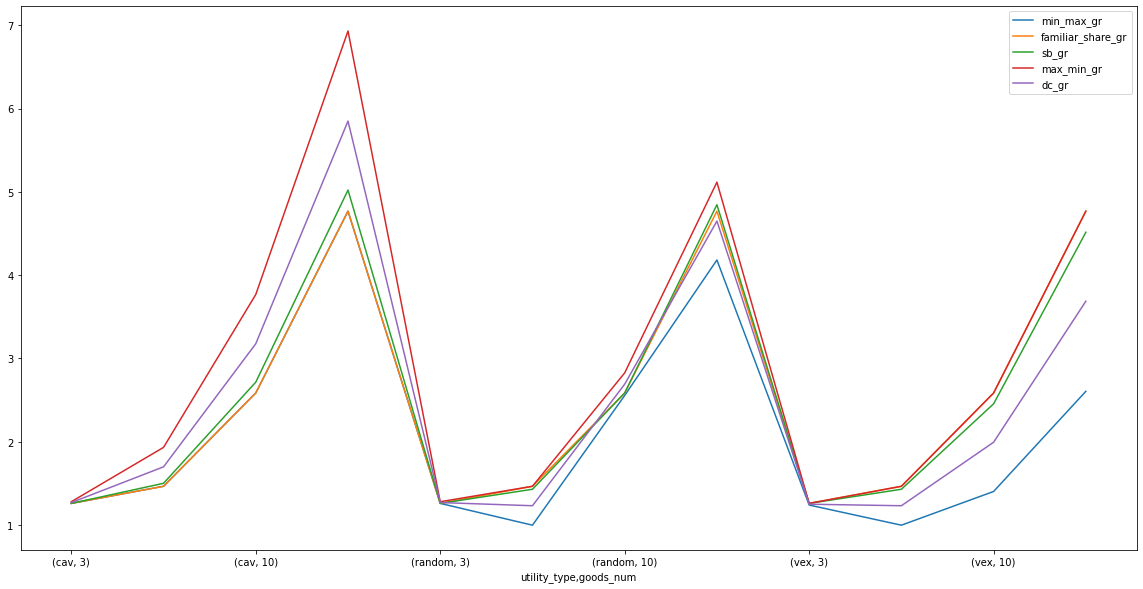

In [7]:
base_experiment(data, ['utility_type', 'goods_num'], guarantees_columns)

as seen from the graph all guarantees values lies beetween min_max and max_min guarantees. </br>
now i will try to find experiment where this condition violates

In [8]:
data['max_guarantee'] = data[guarantees_columns].idxmax(axis=1)
data['min_guarantee'] = data[guarantees_columns].idxmin(axis=1)

data[data['max_min_gr'].round(PRECISION) < data[guarantees_columns].max(axis=1).round(PRECISION)]

,Unnamed: 0,dc_gr,max_min_gr,familiar_share_gr,sb_gr,min_max_gr,goods_num,utility_type,max_guarantee,min_guarantee


In [9]:
data[data['min_max_gr'].round(PRECISION) > data[guarantees_columns].min(axis=1).round(PRECISION)]

,Unnamed: 0,dc_gr,max_min_gr,familiar_share_gr,sb_gr,min_max_gr,goods_num,utility_type,max_guarantee,min_guarantee


Looks like there is no violation for used prcision (10 decimal digits)

### Calculate ratios statistics

In [10]:
ratios = calc_raios(data, ('dc_gr','familiar_share_gr', 'sb_gr'), guarantees_columns, ['utility_type', 'goods_num'])

Ratios mean

In [11]:
ratios.groupby(['utility_type', 'goods_num']).mean()

dc_gr/min_max_gr  dc_gr/familiar_share_gr  \
utility_type goods_num                                              
cav          3                  1.179151                 1.179151   
             5                  1.229229                 1.229229   
             10                 1.232131                 1.232131   
             20                 1.245045                 1.245045   
random       3                  1.173529                 0.989175   
             5                  1.190708                 0.976430   
             10                 1.118602                 1.013272   
             20                 1.102856                 0.986705   
vex          3                  1.367708                 0.820849   
             5                  1.532659                 0.770771   
             10                 1.489840                 0.767869   
             20                 1.505682                 0.754955   

                        dc_gr/sb_gr  dc_gr/max_min_gr  \
utility_type goods_num                                  
cav          3             1.120140          0.874795   
             5             1.146407          0.847555   
             10            1.154755          0.843860   
             20            1.161122          0.836481   
random       3             0.986864          0.898903   
             5             0.972659          0.879339   
             10            1.009736          0.908485   
             20            0.988079          0.917928   
vex          3             0.865387          0.820849   
             5             0.828999          0.770771   
             10            0.821971          0.767869   
             20            0.813525          0.754955   

                        familiar_share_gr/min_max_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              1.000000                 0.953753   
             5                              1.000000                 0.935851   
             10                             1.000000                 0.938782   
             20                             1.000000                 0.933138   
random       3                              1.243165                 1.006119   
             5                              1.267861                 1.003079   
             10                             1.116087                 0.997655   
             20                             1.127318                 1.001860   
vex          3                              1.735416                 1.061994   
             5                              2.065318                 1.082856   
             10                             1.979680                 1.073856   
             20                             2.011363                 1.078829   

                        familiar_share_gr/max_min_gr  familiar_share_gr/dc_gr  \
utility_type goods_num                                                          
cav          3                              0.749590                 0.853110   
             5                              0.695110                 0.817353   
             10                             0.687720                 0.813596   
             20                             0.672963                 0.803981   
random       3                              0.923349                 1.035747   
             5                              0.913835                 1.046905   
             10                             0.903443                 0.995581   
             20                             0.934980                 1.019987   
vex          3                              1.000000                 1.234152   
             5                              1.000000                 1.312785   
             10                             1.000000                 1.310723   
             20                             1.000000                 1

Ratios variance

In [12]:
ratios.groupby(['utility_type', 'goods_num']).var()

dc_gr/min_max_gr  dc_gr/familiar_share_gr  \
utility_type goods_num                                              
cav          3                  0.008387                 0.008387   
             5                  0.007038                 0.007038   
             10                 0.003766                 0.003766   
             20                 0.001555                 0.001555   
random       3                  0.062952                 0.022358   
             5                  0.039864                 0.020334   
             10                 0.005239                 0.008709   
             20                 0.003419                 0.006218   
vex          3                  0.119792                 0.008387   
             5                  0.153603                 0.007038   
             10                 0.067371                 0.003766   
             20                 0.027958                 0.001555   

                        dc_gr/sb_gr  dc_gr/max_min_gr  \
utility_type goods_num                                  
cav          3             0.002485          0.002566   
             5             0.001333          0.001755   
             10            0.000824          0.000837   
             20            0.000570          0.000317   
random       3             0.011156          0.007176   
             5             0.010562          0.004497   
             10            0.007101          0.001507   
             20            0.005523          0.001170   
vex          3             0.003173          0.008387   
             5             0.002189          0.007038   
             10            0.001462          0.003766   
             20            0.000840          0.001555   

                        familiar_share_gr/min_max_gr  familiar_share_gr/sb_gr  \
utility_type goods_num                                                          
cav          3                              0.000000                 0.003516   
             5                              0.000000                 0.002816   
             10                             0.000000                 0.001351   
             20                             0.000000                 0.000516   
random       3                              0.274389                 0.005164   
             5                              0.191331                 0.003560   
             10                             0.026639                 0.000664   
             20                             0.019699                 0.000183   
vex          3                              0.479169                 0.007383   
             5                              0.614412                 0.006015   
             10                             0.269483                 0.002465   
             20                             0.111830                 0.001011   

                        familiar_share_gr/max_min_gr  familiar_share_gr/dc_gr  \
utility_type goods_num                                                          
cav          3                              0.010264                 0.004331   
             5                              0.007021                 0.003243   
             10                             0.003348                 0.001640   
             20                             0.001267                 0.000646   
random       3                              0.013516                 0.028847   
             5                              0.010555                 0.025768   
             10                             0.006719                 0.009212   
             20                             0.004272                 0.006869   
vex          3                              0.000000                 0.021121   
             5                              0.000000                 0.020722   
             10                             0.000000                 0.011406   
             20                             0.000000                 0

# 2. Bargaining gap same pairs

In [13]:
bg_exp = bargaining_gap_experiment.BargainingGapExperiment()
bg_exp.run_and_save(NUMBER_OF_EXPERIMENTS)
bg_exp.columns

{'dc_gr_sum',
 'familiar_share_gr_sum',
 'goods_num',
 'max',
 'min',
 'mix_param',
 'sb_gr_sum',
 'scale_param',
 'utility_type'}

In [14]:
bg_group_cols = {'utility_type', 'goods_num', 'mix_param', 'scale_param'}
sum_guarantees_columns = bg_exp.columns - bg_group_cols
sum_guarantees_columns

{'dc_gr_sum', 'familiar_share_gr_sum', 'max', 'min', 'sb_gr_sum'}

In [15]:
bg_data = bg_exp.load_experiment()

data and plot for random experiment


dc_gr_sum  sb_gr_sum        min  \
scale_param utility_type mix_param goods_num                                    
1.0         cav          0.0       3           2.068699   1.907256   1.243563   
                                   5           3.285206   2.864939   2.023527   
                                   10          4.879600   4.193141   3.376908   
                                   20         10.554934   9.004757   7.745453   
                         0.1       3           1.646872   1.520590   0.988562   
                                   5           3.258485   2.771849   2.551172   
                                   10          6.527917   5.754510   5.061303   
                                   20         13.145215  11.373187  10.272332   
                         0.5       3           2.176524   2.073193   2.026561   
                                   5           3.880575   3.658392   3.588226   
                                   10          6.500757   5.766593   5.403680   
                                   20         12.945849  11.265814  10.603778   
                         0.8       3           1.983106   1.707750   1.646978   
                                   5           3.877161   3.539825   3.311625   
                                   10          5.220775   4.537627   4.104895   
                                   20         11.716250   9.949494   9.425739   
            random       0.0       3           1.730492   1.787872   1.243563   
                                   5           2.847218   2.696254   2.023527   
                                   10          3.872782   3.845007   3.275077   
                                   20          7.937169   8.282145   7.201392   
                         0.1       3           1.280908   1.332738   0.907020   
                                   5           3.030080   2.766163   2.551172   
                                   10          4.766603   5.277893   3.889441   
                                   20         10.183168  10.771946   9.096502   
                         0.5       3           2.067672   2.073193   1.976245   
                                   5           3.646689   3.658392   3.454335   
                                   10          5.191790   5.629179   4.735298   
                                   20         11.364611  11.015729  10.593946   
                         0.8       3           1.434016   1.707750   1.153341   
                                   5           3.635089   3.539825   3.311625   
                                   10          4.160967   4.113080   3.438466   
                                   20          9.520377   9.524624   8.560148   
            vex          0.0       3           1.626430   1.787872   1.212635   
                                   5           1.997264   2.417531   1.134223   
                                   10          2.725478   3.411938   1.523514   
                                   20          6.051795   7.601972   3.800226   
                         0.1       3           1.206456   1.332738   0.758118   
                                   5           2.049076   2.535711   1.384619   
                                   10          4.067770   4.841177   2.682897   
                                   20          8.698065  10.470093   6.416823   
                         0.5       3           1.969862   2.073193   1.843029   
                                   5           3.436210   3.658392   3.207631   
                                   10          4.757602   5.491766   3.886025   
                                   20          8.941648  10.621683   6.914949   
                         0.8       3           1.432394   1.707750   1.153341   
                                   5           2.793740   3.131076   2.235630   
                                   10          3.005384   3.688532   1.896229   
                                   20          7.332998   9.099754   5.130538

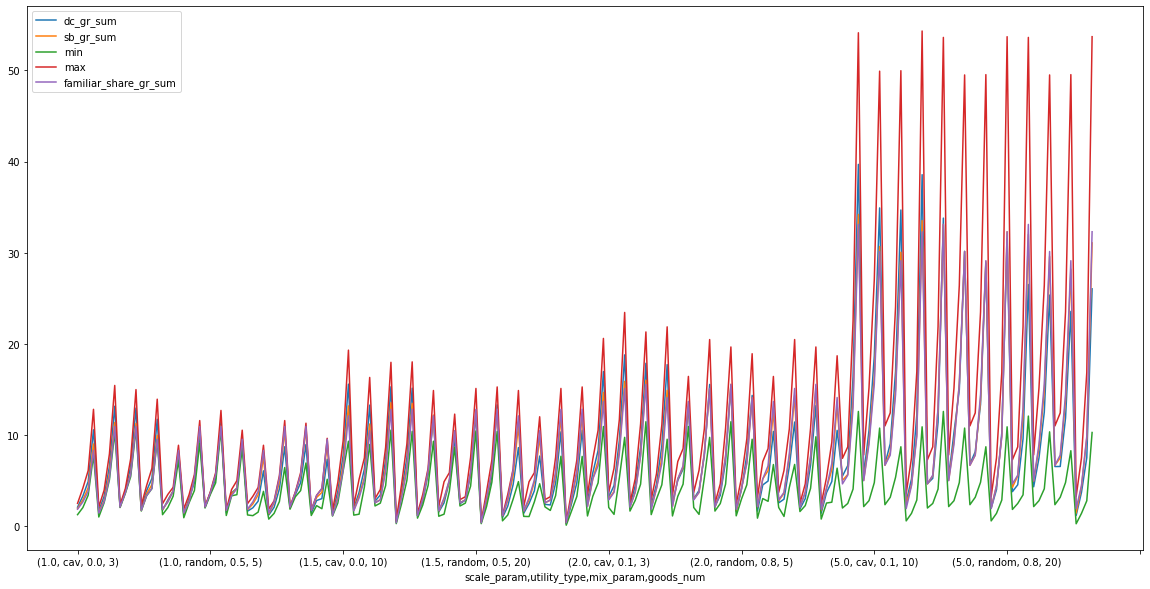

In [16]:
base_experiment(bg_data, list(bg_group_cols), sum_guarantees_columns)

In [17]:
bg_data['max_guarantee'] = bg_data[sum_guarantees_columns].idxmax(axis=1)
bg_data['min_guarantee'] = bg_data[sum_guarantees_columns].idxmin(axis=1)

bg_data[bg_data['max'].round(PRECISION) < bg_data[sum_guarantees_columns].max(axis=1).round(PRECISION)]

,Unnamed: 0,utility_type,sb_gr_sum,dc_gr_sum,scale_param,familiar_share_gr_sum,max,goods_num,min,mix_param,max_guarantee,min_guarantee


In [18]:
bg_data[bg_data['min'].round(PRECISION) > bg_data[sum_guarantees_columns].min(axis=1).round(PRECISION)]

,Unnamed: 0,utility_type,sb_gr_sum,dc_gr_sum,scale_param,familiar_share_gr_sum,max,goods_num,min,mix_param,max_guarantee,min_guarantee


all sum guarantees lies between min and max

### Calculate ratios statistics

In [19]:
bg_ratios = calc_raios(
    bg_data, 
    ('dc_gr_sum','familiar_share_gr_sum', 'sb_gr_sum'), 
    sum_guarantees_columns,
    bg_group_cols
)

In [20]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).mean())

dc_gr_sum/sb_gr_sum  \
scale_param utility_type mix_param goods_num                        
1.0         cav          0.0       3                     1.115240   
                                   5                     1.137794   
                                   10                    1.153924   
                                   20                    1.158560   
                         0.1       3                     1.116332   
                                   5                     1.143714   
                                   10                    1.157622   
                                   20                    1.160475   
                         0.5       3                     1.110452   
                                   5                     1.134093   
                                   10                    1.139810   
                                   20                    1.149072   
                         0.8       3                     1.114961   
                                   5                     1.146365   
                                   10                    1.152694   
                                   20                    1.157516   
            random       0.0       3                     0.995275   
                                   5                     0.995985   
                                   10                    1.001935   
                                   20                    1.003274   
                         0.1       3                     0.987931   
                                   5                     1.007448   
                                   10                    0.989080   
                                   20                    0.994895   
                         0.5       3                     1.005535   
                                   5                     0.992039   
                                   10                    0.994294   
                                   20                    0.999957   
                         0.8       3                     0.987995   
                                   5                     1.001160   
                                   10                    1.013152   
                                   20                    0.990502   
            vex          0.0       3                     0.871579   
                                   5                     0.844058   
                                   10                    0.823813   
                                   20                    0.817031   
                         0.1       3                     0.870996   
                                   5                     0.842109   
                                   10                    0.822740   
                                   20                    0.819008   
                         0.5       3                     0.881064   
                                   5                     0.851287   
                                   10                    0.847918   
                                   20                    0.836509   
                         0.8       3                     0.875012   
                                   5                     0.838707   
                                   10                    0.829334   
                                   20                    0.823899   
1.5         cav          0.0       3                     1.114836   
                                   5                     1.128822   
                                   10                    1.153740   
                                   20                    1.159369   
                         0.1       3                     1.116519   
                                   5                     1.138738   
                                   10                    1.158574   
                                   20                    1.159658   
                         0.5       3        

In [21]:
with pd.option_context('display.max_rows', None,):
    display(bg_ratios.groupby(list(bg_group_cols)).var())

dc_gr_sum/sb_gr_sum  \
scale_param utility_type mix_param goods_num                        
1.0         cav          0.0       3                     0.001535   
                                   5                     0.000916   
                                   10                    0.000498   
                                   20                    0.000265   
                         0.1       3                     0.001057   
                                   5                     0.000689   
                                   10                    0.000456   
                                   20                    0.000287   
                         0.5       3                     0.001499   
                                   5                     0.000707   
                                   10                    0.000460   
                                   20                    0.000308   
                         0.8       3                     0.001685   
                                   5                     0.001333   
                                   10                    0.000701   
                                   20                    0.000543   
            random       0.0       3                     0.004244   
                                   5                     0.004768   
                                   10                    0.003438   
                                   20                    0.002183   
                         0.1       3                     0.006860   
                                   5                     0.005482   
                                   10                    0.004542   
                                   20                    0.002035   
                         0.5       3                     0.008527   
                                   5                     0.008241   
                                   10                    0.005469   
                                   20                    0.003201   
                         0.8       3                     0.008352   
                                   5                     0.009694   
                                   10                    0.006390   
                                   20                    0.004348   
            vex          0.0       3                     0.002083   
                                   5                     0.001402   
                                   10                    0.000808   
                                   20                    0.000455   
                         0.1       3                     0.001481   
                                   5                     0.001027   
                                   10                    0.000707   
                                   20                    0.000472   
                         0.5       3                     0.001903   
                                   5                     0.001133   
                                   10                    0.000697   
                                   20                    0.000454   
                         0.8       3                     0.002336   
                                   5                     0.001845   
                                   10                    0.001163   
                                   20                    0.000858   
1.5         cav          0.0       3                     0.001361   
                                   5                     0.000947   
                                   10                    0.000564   
                                   20                    0.000224   
                         0.1       3                     0.001288   
                                   5                     0.001000   
                                   10                    0.000520   
                                   20                    0.000297   
                         0.5       3        